In [1]:
# Importando as bibliotecas necessárias

import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# Lendo a base e guardando na variável df

df = pd.read_csv('Consumo_cerveja.csv')

In [3]:
# Printando o dataframe

df

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Pegando informações do data frame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


**Comentário:** Perceba que há 365 valores não nulos em todas as colunas. Porém o dataframe possui 941 linhas 

In [5]:
# Vamos pegar o dataframe a partir da linha 365 e utilizara novamente o método .info()

df[365:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 365 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         0 non-null      object 
 1   Temperatura Media (C)        0 non-null      object 
 2   Temperatura Minima (C)       0 non-null      object 
 3   Temperatura Maxima (C)       0 non-null      object 
 4   Precipitacao (mm)            0 non-null      object 
 5   Final de Semana              0 non-null      float64
 6   Consumo de cerveja (litros)  0 non-null      float64
dtypes: float64(2), object(5)
memory usage: 31.6+ KB


**Comentário:** Perceba que a partir da linha 365 todos os valores são nulos em todas as colunas. Logo iremos retirar do data frame essas linhas

In [6]:
# Dropando todas as linhas nulas do dataframe e printando novamente o dataframe
# O argumento 'inplace = True' torna desnecessário criar um novo dataframe

df.dropna(inplace = True)

df

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
360,2015-12-27,24,"21,1","28,2","13,6",1.0,32.307
361,2015-12-28,"22,64","21,1","26,7",0,0.0,26.095
362,2015-12-29,"21,68","20,3","24,1","10,3",0.0,22.309
363,2015-12-30,"21,38","19,3","22,4","6,3",0.0,20.467


In [7]:
# Vamos fazer um group by na coluna 'Final de Semana' para ver a quantidade e os valores que essa coluna assume
df.groupby('Final de Semana').size().reset_index(name='Quantidade')

,Final de Semana,Quantidade
0,0.0,261
1,1.0,104


In [8]:
# Perceba que os Dtype estão como:

 # Coluna                         Dtype  

 # Data                           object 
 # Temperatura Media (C)          object 
 # Temperatura Minima (C)         object 
 # Temperatura Maxima (C)         object 
 # Precipitacao (mm)              object 
 # Final de Semana                float64
 # Consumo de cerveja (litros)    float64

# Vamos tranformar os valores das colunas de Temperatura Media (C), Temperatura Minima (C), Temperatura Maxima (C)
# e Precipitacao (mm) em float64

# Se utilizássemos o método .astype('float64') daria erro pois os valores estão separdos por vírgula
# Exemplo: 27,3
# O correto deveria ser 27.3
# O código abaixo faz essa conversão

# A coluna 'Final de Semana' assume valores 0 ou 1. Logo iremos colocar essa variável como categórica

df['Temperatura Media (C)'] = pd.to_numeric(df['Temperatura Media (C)'].str.replace(',', '.'), errors='coerce')
df['Temperatura Minima (C)'] = pd.to_numeric(df['Temperatura Minima (C)'].str.replace(',', '.'), errors='coerce')
df['Temperatura Maxima (C)'] = pd.to_numeric(df['Temperatura Maxima (C)'].str.replace(',', '.'), errors='coerce')
df['Precipitacao (mm)'] = pd.to_numeric(df['Precipitacao (mm)'].str.replace(',', '.'), errors='coerce')
df['Final de Semana'] = df['Final de Semana'].astype('category')

In [9]:
# Printando o tipo das colunas e as primeiras linhas

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Data                         365 non-null    object  
 1   Temperatura Media (C)        365 non-null    float64 
 2   Temperatura Minima (C)       365 non-null    float64 
 3   Temperatura Maxima (C)       365 non-null    float64 
 4   Precipitacao (mm)            365 non-null    float64 
 5   Final de Semana              365 non-null    category
 6   Consumo de cerveja (litros)  365 non-null    float64 
dtypes: category(1), float64(5), object(1)
memory usage: 20.4+ KB


,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


In [10]:
# Vamos dividir a base em treino e teste antes da análise exploratória para não se tomar alguma decisão
# baseado nos dados de teste

train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

In [11]:
# Fazendo uma análise rápida das variáveis contínuas float64

train_data.describe()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Consumo de cerveja (litros)
count,292.000000,292.000000,292.000000,292.000000,292.000000
mean,21.103699,17.317466,26.461986,5.161301,25.173113
std,3.232581,2.882571,4.348546,12.160690,4.288006
min,12.900000,10.600000,14.500000,0.000000,14.343000
25%,18.735000,15.175000,23.675000,0.000000,22.026000
50%,21.260000,17.600000,26.600000,0.000000,24.704500
75%,23.145000,19.500000,29.225000,3.400000,28.406500
max,28.860000,24.500000,36.500000,85.300000,37.690000


In [12]:
# Fazendo um count da variável categórica 'Final de Semana'

train_data['Final de Semana'].value_counts()

0.0    216
1.0     76
Name: Final de Semana, dtype: int64

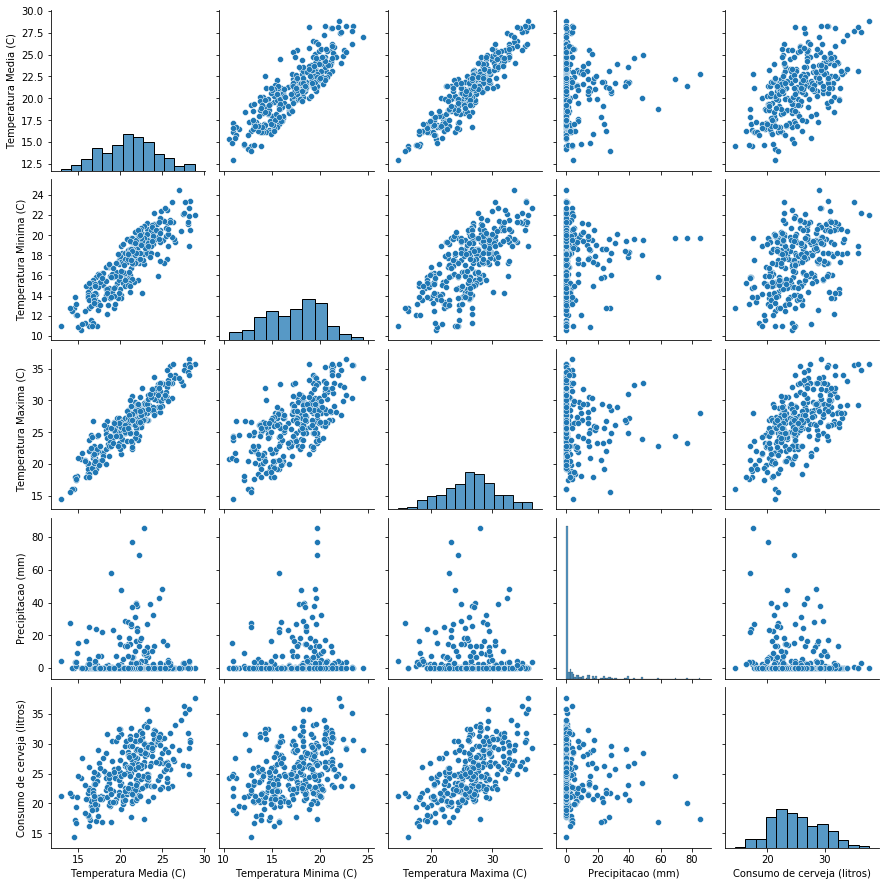

In [13]:
# Fazendo um pairplot entre as variáveis do dataframe.

sns.pairplot(train_data, aspect=1)

**Comentário:**  Perceba que, em relação ao consumo de cerveja, há relações lineares entre as Temperaturas Média, Mínima e Máxima. Em relação a Precipitacao (mm) podemos considerar que quanto menor precipitação, maior a frequência de consumo de cerveja e maior também os valores desse consumo. Podemos notar também que o consumo de cerveja descreve uma distribuição aproximadamente normal com uma média de ~25 litros

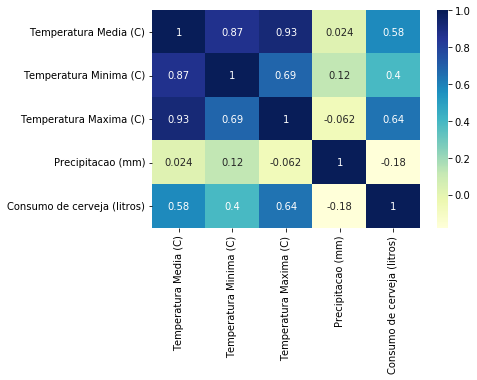

In [14]:
# Fazendo o plot da matriz de correlação entre as variáveis contínuas

correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")

**Comentário:** Note uma correlação positiva entre as temperaturas e o consumo de cerveja, conforme observado visualmente nos gráficos. Também temos ums relação negativa entre o consumo de cerveja e a precipitação. Vemos também uma alta correlação 0.93 entre Temperatura Média e Temperatura Máxima sugerindo que uma das duas variáveis sejam excluídas. Porém vamos mante-lás para verificar posteriormente se a exclusão de uma delas afetaria a performance do modelo

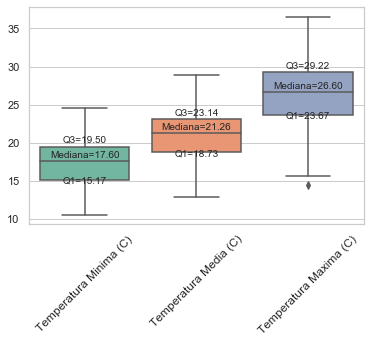

In [15]:
# Fazendo BoxPlot das variáveis de Temperatura

sns.set(style="whitegrid")
ax = sns.boxplot(data=train_data[['Temperatura Minima (C)', 'Temperatura Media (C)', 'Temperatura Maxima (C)']], orient="v", palette="Set2")
ax.tick_params(axis='x', labelsize=12, rotation=45)

medians = train_data[['Temperatura Minima (C)', 'Temperatura Media (C)', 'Temperatura Maxima (C)']].median().values

for i, col in enumerate(train_data[['Temperatura Minima (C)', 'Temperatura Media (C)', 'Temperatura Maxima (C)']].columns):
    x_pos = i
    median_val = medians[i]
    q1 = train_data[col].quantile(0.25)
    q3 = train_data[col].quantile(0.75)
    ax.text(x_pos, median_val + 0.5, f'Mediana={medians[i]:.2f}', ha='center', fontsize=10)
    ax.text(x_pos, q1 - 0.5, f'Q1={q1:.2f}', ha='center', fontsize=10)
    ax.text(x_pos, q3 + 0.5, f'Q3={q3:.2f}', ha='center', fontsize=10)

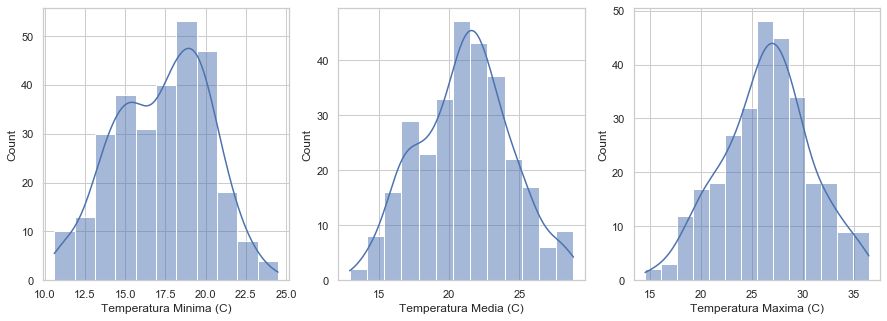

In [16]:
# Fazendo o plot das distribuições das variáveis

fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

sns.histplot(data=train_data, x="Temperatura Minima (C)", kde=True, ax=axs[0])
sns.histplot(data=train_data, x="Temperatura Media (C)", kde=True, ax=axs[1])
sns.histplot(data=train_data, x="Temperatura Maxima (C)", kde=True, ax=axs[2])

plt.show()

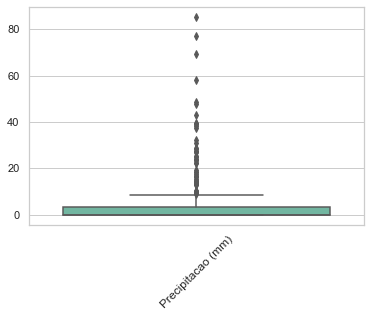

In [17]:
# Fazendo BoxPlot da variável de Precipitacao

sns.set(style="whitegrid")
ax = sns.boxplot(data=train_data[['Precipitacao (mm)']], orient="v", palette="Set2")
ax.tick_params(axis='x', labelsize=12, rotation=45)

**Comentário:** Note que há um "colapso" do blox plot pois o valor mínimo, percentil 25% e percentil 50% possuem os mesmos valores. Isso denota uma concentração dos dados como veremos no gráfico de distribuição

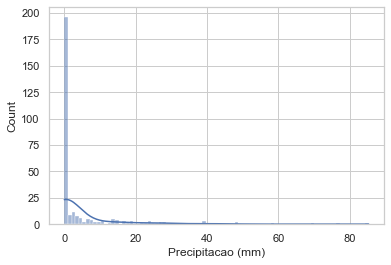

In [18]:
# Fazendo o plot da distribuição da variável Precipitacao

sns.histplot(data=train_data, x="Precipitacao (mm)", kde=True)

**Comentário:** Note a concentração próximo a 0

In [19]:
# Fazendo análise do consumo de cerveja e a variável de Final de semana == 1

train_data.loc[train_data['Final de Semana'] == 1, 'Consumo de cerveja (litros)'].describe()

count    76.000000
mean     28.613711
std       3.727181
min      20.738000
25%      25.916500
50%      29.238000
75%      31.174250
max      37.690000
Name: Consumo de cerveja (litros), dtype: float64

In [20]:
# Fazendo análise do consumo de cerveja e a variável de Final de semana == 0

train_data.loc[train_data['Final de Semana'] == 0, 'Consumo de cerveja (litros)'].describe()

count    216.000000
mean      23.962532
std        3.792594
min       14.343000
25%       21.272000
50%       23.422000
75%       26.323750
max       35.861000
Name: Consumo de cerveja (litros), dtype: float64

**Comentário:** Note que, mesmo com count menor (76) o valor médio de consumo é maior quando comparado aos dados de valor de Final de semana == 0

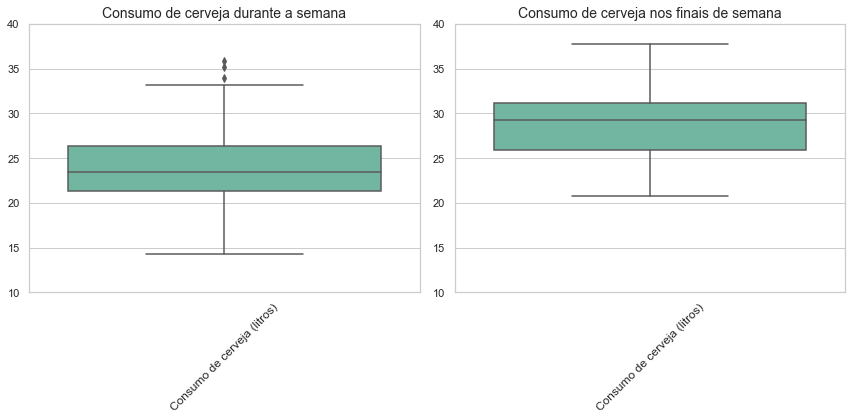

In [21]:
sns.set(style="whitegrid")

fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

ax1 = sns.boxplot(data=train_data.loc[train_data['Final de Semana'] == 0, 'Consumo de cerveja (litros)'].to_frame(), orient="v", palette="Set2", ax=axs[0])
ax1.tick_params(axis='x', labelsize=12, rotation=45)
ax1.set_title('Consumo de cerveja durante a semana', fontsize=14)
ax1.set_ylim([10, 40])

ax2 = sns.boxplot(data=train_data.loc[train_data['Final de Semana'] == 1, 'Consumo de cerveja (litros)'].to_frame(), orient="v", palette="Set2", ax=axs[1])
ax2.tick_params(axis='x', labelsize=12, rotation=45)
ax2.set_title('Consumo de cerveja nos finais de semana', fontsize=14)
ax2.set_ylim([10, 40])

plt.tight_layout()
plt.show()


In [22]:
# Treinando a regressão linear e calculando como métrica do treino o MSE

regressor = LinearRegression()

regressor.fit(train_data[['Temperatura Media (C)', 'Temperatura Minima (C)', 'Temperatura Maxima (C)', 'Precipitacao (mm)','Final de Semana']], train_data['Consumo de cerveja (litros)'])

y_pred_train = regressor.predict(train_data[['Temperatura Media (C)', 'Temperatura Minima (C)', 'Temperatura Maxima (C)', 'Precipitacao (mm)','Final de Semana']])

mse_train = mean_squared_error(train_data['Consumo de cerveja (litros)'], y_pred_train)

print('Erro quadrado médio - treino:', round(mse_train,3))

Erro quadrado médio - treino: 5.307


In [23]:
# Printando os coefientes:

vars = ['Temperatura Media (C)', 'Temperatura Minima (C)', 'Temperatura Maxima (C)', 'Precipitacao (mm)','Final de Semana']

for i, j in enumerate(regressor.coef_):
    print(f'''Coeficiente da variável {vars[i]}: {round(j,5)} ''')

print(f'''Coeficiente Linear (Bias): {round(regressor.intercept_, 5)} ''')

Coeficiente da variável Temperatura Media (C): 0.09651 
Coeficiente da variável Temperatura Minima (C): -0.06282 
Coeficiente da variável Temperatura Maxima (C): 0.63069 
Coeficiente da variável Precipitacao (mm): -0.04341 
Coeficiente da variável Final de Semana: 5.14719 
Coeficiente Linear (Bias): 6.41926 


In [24]:
# Fazendo predição dos valores e calculando como métrica do teste o MSE

y_pred = regressor.predict(test_data[['Temperatura Media (C)', 'Temperatura Minima (C)', 'Temperatura Maxima (C)', 'Precipitacao (mm)','Final de Semana']])

mse_test = mean_squared_error(test_data['Consumo de cerveja (litros)'], y_pred)

print('Erro quadrado médio - teste:', round(mse_test,3))

Erro quadrado médio - teste: 5.699


In [25]:
# Plotando os dados reais versus dados preditos

test_data['Consumo_Pred'] = y_pred

C:\Users\GZ\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Valor predito')

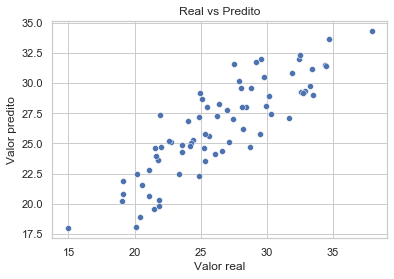

In [26]:
sns.scatterplot(x='Consumo de cerveja (litros)', y='Consumo_Pred', data=test_data)
plt.title('Real vs Predito')
plt.xlabel('Valor real')
plt.ylabel('Valor predito')